In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

Importing libraries

In [2]:
url = 'https://www.flipkart.com/search?q=tv+smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tv+smart+tv%7CTelevisions&requestId=4a66db9c-a5d7-4bd1-a82c-970ddd816d66&as-searchtext=tv+&p%5B%5D=facets.screen_size%255B%255D%3D39%2B-%2B43%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D60%2Binch%2B%2BAbove&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DHisense&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DThomson&p%5B%5D=facets.brand%255B%255D%3DCANDY&p%5B%5D=facets.brand%255B%255D%3DTCL&p%5B%5D=facets.brand%255B%255D%3DSENS&p%5B%5D=facets.brand%255B%255D%3DTOSHIBA&p%5B%5D=facets.brand%255B%255D%3DHaier&p%5B%5D=facets.brand%255B%255D%3DAcer&p%5B%5D=facets.brand%255B%255D%3DSansui&p%5B%5D=facets.brand%255B%255D%3DKODAK&p%5B%5D=facets.brand%255B%255D%3DBlaupunkt&p%5B%5D=facets.brand%255B%255D%3DiFFALCON&p%5B%5D=facets.brand%255B%255D%3DVu&p%5B%5D=facets.brand%255B%255D%3DLloyd&p%5B%5D=facets.brand%255B%255D%3DCoocaa&p%5B%5D=facets.brand%255B%255D%3DBPL&p%5B%5D=facets.brand%255B%255D%3Dskylive&p%5B%5D=facets.brand%255B%255D%3DONIDA&p%5B%5D=facets.brand%255B%255D%3DDyanora&p%5B%5D=facets.brand%255B%255D%3DHyundai&p%5B%5D=facets.brand%255B%255D%3DAdmiral&page=2'

In [3]:
page = requests.get(url)

In [4]:
page

<Response [500]>

## Unable to access webpage data 
To outcome this problem we have to give request header in side it we are giving content type, user agent, accept encoding

In [5]:
request_header = {'Content-Type':'html/text;charset=UTF-8', 'User-Agent':'Chrome/101.0.0.0 (Windows NT 10.0, Winx64;x64;rv:109.0) Gecko/20100101 Firefox/119.0', 'Accept-Encoding':'gzip, deflate, br'}

## After request _header
Proving requests to url using request header

In [6]:
page = requests.get(url, headers = request_header)

In [7]:
page

<Response [200]>

In [8]:
page.status_code

200

In [9]:
soup = BeautifulSoup(page.text)

## Data extraction from div class KzDlHZ
Extracting the web page data from the div class KzDlHZ

In [10]:
a = soup.find_all('div', attrs = {'class':'KzDlHZ'})
a

[<div class="KzDlHZ">iFFALCON by TCL 139 cm (55 inch) QLED Ultra HD (4K) Smart Google TV With Dolby Atmos Vision &amp; HDR10</div>,
 <div class="KzDlHZ">LG UR7500 139 cm (55 inch) Ultra HD (4K) LED Smart WebOS TV with Alpha75 Gen6 AI Processor, AI Picture...</div>,
 <div class="KzDlHZ">Vu GloLED 108 cm (43 inch) Ultra HD (4K) LED Smart Google TV with DJ Subwoofer 84W</div>,
 <div class="KzDlHZ">TCL 138.71 cm (55 inch) Ultra HD (4K) LED Smart Google TV 2024 Edition with with 24W Dolby Audio and M...</div>,
 <div class="KzDlHZ">Thomson FA Series 106 cm (42 inch) Full HD LED Smart Android TV with Dolby Digital Plus &amp; Android 11</div>,
 <div class="KzDlHZ">Coocaa 138 cm (55 inch) Ultra HD (4K) LED Smart Coolita TV 2024 Edition with Dolby Audio and Eye Care ...</div>,
 <div class="KzDlHZ">TCL 108 cm (43 inch) QLED Ultra HD (4K) Smart Google TV with 30W Dolby Atmos</div>,
 <div class="KzDlHZ">SAMSUNG New D Series Brighter Crystal Vision Pro (2024 Edition) 138 cm (55 inch) Ultra HD (4K) L

In [11]:
## Accessing the products index wise
a[0]

<div class="KzDlHZ">iFFALCON by TCL 139 cm (55 inch) QLED Ultra HD (4K) Smart Google TV With Dolby Atmos Vision &amp; HDR10</div>

# .text
The data is present inside the 'div' class hence we are accessing the data using .text method

In [12]:
a[0].text

'iFFALCON by TCL 139 cm (55 inch) QLED Ultra HD (4K) Smart Google TV With Dolby Atmos Vision & HDR10'

extracting Prices of the products Using for loop we have extracted the div class cN1yYO

In that Item is j and iterables are soup.find_all('div', attrs = {'class':'cN1yYO'})

We have created the variable called Price inside that we have created find method which finds the 'div' from the class cN1yYO

Inside it we have applied conditional statement if .

If the Prices are None it prints np.nan Else it print Price.text

Hence extracted all the text data using variable (Price) using (.text) method

In [13]:
for j in soup.find_all('div', attrs = {'class':'cN1yYO'}):
    Price = j.find('div', attrs = {'class':"Nx9bqj _4b5DiR"})
    
    if Price is None:
        print(np.nan)
        print()
    else:
        print(Price.text)
        print()

₹33,999

₹43,990

₹26,499

₹34,990

₹15,499

₹24,999

₹27,990

₹44,990

₹24,990

₹54,990

₹20,990

₹30,990

₹20,499

₹25,499

₹42,999

₹36,990

₹27,999

₹16,999

₹27,999

₹45,990

₹20,999

₹37,999

₹27,990

₹16,999



### extracting details of the products 

* Using for loop we have extracted the div class _6NESgJ

* In that Item is j and iterables are soup.find_all('div', attrs = {'class':'_6NESgJ'})

* We have created the variable called Specs inside that we have created  find method which finds the 'ul' from the class G4BRas

* Inside it we have applied conditional statement if .

* If the specs are None it prints np.nan Else it print Specs.text

* Hence extracted all the text data using variable (Specs) using (.text) method


In [14]:
for j in soup.find_all('div', attrs = {'class':'_6NESgJ'}):
    Specs = j.find('ul', attrs = {'class':"G4BRas"})
    
    if Specs is None:
        print(np.nan)
        print()
    else:
        print(Specs.text)
        print()

Operating System: Google TVUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20231 Year Warranty

Operating System: WebOSUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20231 Year Product Warranty Applicable

Operating System: Google TVUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20221 Year Domestic Warranty from Vu

Operating System: Google TVUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20242 Years Warranty on Product

Operating System: AndroidFull HD 1080 x 1920 PixelsLaunch Year: 20231 Year Warranty on Product and 6 Months Warranty on Accessories

Operating System: CoolitaUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20241 Year Comprehensive Warranty On Product

Operating System: Google TVUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20242 Years Comprehensive Warranty on Product

Operating System: TizenUltra HD (4K) 3840 x 2160 PixelsLaunch Year: 20242 Year Warranty (1 Year Standard Warranty + 1 Year additional warranty on Panel)

Operating System: TizenFull HD 1920 x 1080 PixelsLaunch Year: 

### extracting details of the ratings

In [15]:
for j in soup.find_all('div', attrs = {'class':'_5OesEi'}):
    Ratings = j.find('div', attrs = {'class':"XQDdHH"})
    
    if Ratings is None:
        print(np.nan)
        print()
    else:
        print(Ratings.text)
        print()

4.2

4.4

4.4

4.1

4.3

4.2

4.2

4.3

4.3

4.6

4.2

4.3

4.2

4.5

4.3

4.2

4.3

4.4

4.3

4.4

4.2

4.2

4.2

4.3



# URL

* Extracting all the url webpages using for loop

* The URL is taken as strings and applied (.format) method to the url

* Where the for loop contains the range of (1,31) The loop iterates i value prints as 1 2 3 4 ........

* The web pages contains page numbers which we iterate i value using .format method in the url

* All the web pages are printed

In [16]:
for i in range(1,31):
    url = 'https://www.flipkart.com/search?q=tv+smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tv+smart+tv%7CTelevisions&requestId=4a66db9c-a5d7-4bd1-a82c-970ddd816d66&as-searchtext=tv+&p%5B%5D=facets.screen_size%255B%255D%3D39%2B-%2B43%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D60%2Binch%2B%2BAbove&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DHisense&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DThomson&p%5B%5D=facets.brand%255B%255D%3DCANDY&p%5B%5D=facets.brand%255B%255D%3DTCL&p%5B%5D=facets.brand%255B%255D%3DSENS&p%5B%5D=facets.brand%255B%255D%3DTOSHIBA&p%5B%5D=facets.brand%255B%255D%3DHaier&p%5B%5D=facets.brand%255B%255D%3DAcer&p%5B%5D=facets.brand%255B%255D%3DSansui&p%5B%5D=facets.brand%255B%255D%3DKODAK&p%5B%5D=facets.brand%255B%255D%3DBlaupunkt&p%5B%5D=facets.brand%255B%255D%3DiFFALCON&p%5B%5D=facets.brand%255B%255D%3DVu&p%5B%5D=facets.brand%255B%255D%3DLloyd&p%5B%5D=facets.brand%255B%255D%3DCoocaa&p%5B%5D=facets.brand%255B%255D%3DBPL&p%5B%5D=facets.brand%255B%255D%3Dskylive&p%5B%5D=facets.brand%255B%255D%3DONIDA&p%5B%5D=facets.brand%255B%255D%3DDyanora&p%5B%5D=facets.brand%255B%255D%3DHyundai&p%5B%5D=facets.brand%255B%255D%3DAdmiral&page={}'.format(i)
    print(url)

https://www.flipkart.com/search?q=tv+smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tv+smart+tv%7CTelevisions&requestId=4a66db9c-a5d7-4bd1-a82c-970ddd816d66&as-searchtext=tv+&p%5B%5D=facets.screen_size%255B%255D%3D39%2B-%2B43%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D60%2Binch%2B%2BAbove&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DHisense&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DThomson&p%5B%5D=facets.brand%255B%255D%3DCANDY&p%5B%5D=facets.brand%255B%255D%3DTCL&p%5B%5D=facets.brand%255B%255D%3DSENS&p%5B%5D=facets.brand%255B%255D%3DTOSHIBA&p%5B%5D=facets.brand%255B%255D%3DHaie

### Merging 

* Created the empty lists of Product_Name, Selling_Price, Original_Price, Specs, Ratings

* Iterating the data of the web pages using FOR loops

* Provided the request headers if the page response is 500. The website url data may be not extracted

* created another FOR loop inside where the div class iterated through soup.find_all('div', attrs = {'class':'yKfJKb row'})

* Created variables as pname, price, op, specs, ratings where it find respective classes 

* Extracting the data using if else condition if the data is not present it prints np.nan else it prints variables.text

In [17]:
### now extract all the data from the above webpages

Product_Name = []
Selling_Price = []
Original_Price=[]
Specs = []
Ratings = []


for i in range(1,40):
    starttime = time.time()
    url = 'https://www.flipkart.com/search?q=tv+smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tv+smart+tv%7CTelevisions&requestId=4a66db9c-a5d7-4bd1-a82c-970ddd816d66&as-searchtext=tv+&p%5B%5D=facets.screen_size%255B%255D%3D39%2B-%2B43%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D60%2Binch%2B%2BAbove&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DHisense&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DThomson&p%5B%5D=facets.brand%255B%255D%3DCANDY&p%5B%5D=facets.brand%255B%255D%3DTCL&p%5B%5D=facets.brand%255B%255D%3DSENS&p%5B%5D=facets.brand%255B%255D%3DTOSHIBA&p%5B%5D=facets.brand%255B%255D%3DHaier&p%5B%5D=facets.brand%255B%255D%3DAcer&p%5B%5D=facets.brand%255B%255D%3DSansui&p%5B%5D=facets.brand%255B%255D%3DKODAK&p%5B%5D=facets.brand%255B%255D%3DBlaupunkt&p%5B%5D=facets.brand%255B%255D%3DiFFALCON&p%5B%5D=facets.brand%255B%255D%3DVu&p%5B%5D=facets.brand%255B%255D%3DLloyd&p%5B%5D=facets.brand%255B%255D%3DCoocaa&p%5B%5D=facets.brand%255B%255D%3DBPL&p%5B%5D=facets.brand%255B%255D%3Dskylive&p%5B%5D=facets.brand%255B%255D%3DONIDA&p%5B%5D=facets.brand%255B%255D%3DDyanora&p%5B%5D=facets.brand%255B%255D%3DHyundai&p%5B%5D=facets.brand%255B%255D%3DAdmiral&page={}'.format(i)
    page = requests.get(url, headers = request_header)
    soup = BeautifulSoup(page.text)
    
    
    for j in soup.find_all('div', attrs = {'class':'yKfJKb row'}):
        pname = j.find('div', attrs = {'class':'KzDlHZ'})
        price = j.find('div', attrs = {'class':'Nx9bqj _4b5DiR'})
        op = j.find('div', attrs = {'class':'yRaY8j ZYYwLA'})
        specs = j.find('ul', attrs = {'class':'G4BRas'})
        ratings = j.find('div', attrs = {'class':'XQDdHH'})
        
        if pname is None:
            Product_Name.append(np.nan)
        else:
            Product_Name.append(pname.text)
            
        if price is None:
            Selling_Price.append(np.nan)
        else:
            Selling_Price.append(price.text)
        
        
        if op is None:
            Original_Price.append(np.nan)
        else:
            Original_Price.append(op.text)
            
            
                
        if specs is None:
            Specs.append(np.nan)
        else:
            Specs.append(specs.text)
            
        if ratings is None:
            Ratings.append(np.nan)
        else:
            Ratings.append(ratings.text)
    endtime = time.time()
    print('The time taken is {}'.format(endtime-starttime))

The time taken is 1.3720760345458984
The time taken is 1.58237886428833
The time taken is 1.5257251262664795
The time taken is 1.3822650909423828
The time taken is 1.577925682067871
The time taken is 1.4203417301177979
The time taken is 1.5375926494598389
The time taken is 1.4217867851257324
The time taken is 1.6548962593078613
The time taken is 1.3144009113311768
The time taken is 1.490173578262329
The time taken is 1.3059501647949219
The time taken is 1.5609674453735352
The time taken is 1.3892812728881836
The time taken is 1.5399510860443115
The time taken is 1.6010627746582031
The time taken is 1.8452284336090088
The time taken is 2.65276837348938
The time taken is 1.3679490089416504
The time taken is 1.2683403491973877
The time taken is 1.244565486907959
The time taken is 1.3408498764038086
The time taken is 1.1531596183776855
The time taken is 1.637221097946167
The time taken is 1.439131259918213
The time taken is 1.3618102073669434
The time taken is 1.3035175800323486
The time t

# Appended data into list form

* Created data Varible with respect to lists.

* Inside the dictionary, the headers are used as keys, and the values are lists that have been appended.

* Created a dataframe named df using pandas df = pd.DataFrame(data)

In [18]:
data = {
    'Product_Name':Product_Name,
    'Selling_Price':Selling_Price,
    'Original_Price':Original_Price,
    'Specs':Specs,
    'Ratings':Ratings,
    
}

In [19]:
df = pd.DataFrame(data)
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3
...,...,...,...,...,...
691,Mi Q1 138.8 cm (55 inch) QLED Ultra HD (4K) Sm...,"₹59,999",NaN,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,"₹14,999","₹22,999",Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,"₹43,990","₹64,900",Operating System: TizenUltra HD (4K) 3840 x 21...,4.3
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,"₹1,56,900","₹2,49,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.8


* The data frame consists of 671 rows and 5 columns

* Saving the data frame to csv using df.to_csv('Telivisions.csv', index = False)

* Reading the saved csv using pd.read_csv(Telivisions.csv)


In [20]:
df.to_csv('Telivisions.csv', index = False)
df = pd.read_csv('Telivisions.csv')
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3
...,...,...,...,...,...
691,Mi Q1 138.8 cm (55 inch) QLED Ultra HD (4K) Sm...,"₹59,999",NaN,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,"₹14,999","₹22,999",Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,"₹43,990","₹64,900",Operating System: TizenUltra HD (4K) 3840 x 21...,4.3
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,"₹1,56,900","₹2,49,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.8


In [21]:
df.head()

,Product_Name,Selling_Price,Original_Price,Specs,Ratings
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3


# Creating Name column

* Applying regular expressions to it from the product name it finds the name of the product using \w+ 

* \w is the short hand method from regular expressions which extracts A word character(a-zA-z0-9)

* \w+ referest to A word character(a-zA-z0-9)+ which extract a word

* ^ = (starttswith)

* ^\w+ is the from of regular expression which extracts the first word from the data

* Applying lambda method where it apply the index as x 

* Converting the name column into title method which returns tha name in title format string data ex: Samsung, Lg, Sony

In [22]:
df.Product_Name[0]

'Acer Advanced I Series 102 cm (40 inch) Full HD LED Smart Google TV with 1.5GB RAM, 16GB Storage, 30W ...'

In [23]:
re.findall('^\w+',df.Product_Name[0])

['Acer']

In [24]:
df['Name'] = df.Product_Name.apply(lambda x: ' '.join(re.findall('^\w+',x)))

In [25]:
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7,SONY
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,MOTOROLA
...,...,...,...,...,...,...
691,Mi Q1 138.8 cm (55 inch) QLED Ultra HD (4K) Sm...,"₹59,999",NaN,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4,Mi
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,"₹14,999","₹22,999",Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3,KODAK
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,"₹43,990","₹64,900",Operating System: TizenUltra HD (4K) 3840 x 21...,4.3,SAMSUNG
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,"₹1,56,900","₹2,49,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.8,SONY


In [26]:
df['Name'] = df.Name.str.title()

In [27]:
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7,Sony
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Motorola
...,...,...,...,...,...,...
691,Mi Q1 138.8 cm (55 inch) QLED Ultra HD (4K) Sm...,"₹59,999",NaN,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4,Mi
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,"₹14,999","₹22,999",Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3,Kodak
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,"₹43,990","₹64,900",Operating System: TizenUltra HD (4K) 3840 x 21...,4.3,Samsung
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,"₹1,56,900","₹2,49,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.8,Sony


### Size Column

* \d is the shorthand method to extract number (0-9) Where + extracts the number of continious numbers after (0-9)+. Ex: 43

* \s stands for slash

* '\d+\sinch' Extracts the inches values form the column df.Product_Name

* Extracting the strings containing inch and and replacing the null values with np.nan

* Hence converting it into integer data type using .astype(int)

* After converting the data dropping the columns where the sizes are missing

In [28]:
re.findall('\d+\sinch', df['Product_Name'][0] )

['40 inch']

In [29]:
df['Size'] = df['Product_Name'].apply(lambda x: ''.join(re.findall(  '\d+\sinch' ,x)))

In [30]:
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name,Size
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer,40 inch
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7,Sony,43 inch
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson,43 inch
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi,55 inch
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Motorola,55 inch
...,...,...,...,...,...,...,...
691,Mi Q1 138.8 cm (55 inch) QLED Ultra HD (4K) Sm...,"₹59,999",NaN,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4,Mi,55 inch
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,"₹14,999","₹22,999",Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3,Kodak,43 inch
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,"₹43,990","₹64,900",Operating System: TizenUltra HD (4K) 3840 x 21...,4.3,Samsung,55 inch
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,"₹1,56,900","₹2,49,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.8,Sony,55 inch


In [31]:
df['Size'] = df['Size'].str.replace(' inch','')


In [32]:
df['Size'] = df['Size'].replace('',np.nan)

In [33]:
df = df.dropna(subset = 'Size')

In [34]:
df['Size'] = df['Size'].astype(int)

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\4069769182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(int)


In [35]:
df.head()

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name,Size
0,Acer Advanced I Series 102 cm (40 inch) Full H...,"₹17,499","₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer,40
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,"₹40,990","₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7,Sony,43
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,"₹21,999","₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson,43
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,"₹36,999","₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi,55
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,"₹32,999","₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Motorola,55


In [36]:
### Hence we can see the size data type as int
df.dtypes

Product_Name       object
Selling_Price      object
Original_Price     object
Specs              object
Ratings           float64
Name               object
Size                int32
dtype: object

In [37]:
re.findall(r'(Full HD LED|QLED Ultra HD 4K|Ultra HD \(4K\)|OLED Ultra HD 4K|QLED Ultra HD \(4K\))',df['Product_Name'][0])

['Full HD LED']

# Display column

* r'(Full HD LED|QLED Ultra HD 4K|Ultra HD \(4K\)|OLED Ultra HD 4K|QLED Ultra HD \(4K\)' 

* Which finds the exacts words from the df.Product_Name


* Extract the Display Information: Use regular expressions to capture display information such as "Full HD LED," "Ultra HD (4K)," or "QLED Ultra HD 4K."

* Replace Null Values: Replace null values with np.nan

* Drop Columns with Missing Display Information: Remove columns where the display information is missing.

* converting the display information into title case

In [38]:
df['Display'] = df['Product_Name'].apply(lambda x: ' '.join(re.findall(r'(Full HD LED|QLED Ultra HD 4K|Ultra HD \(4K\)|OLED Ultra HD 4K|QLED Ultra HD \(4K\))',x)))

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\3259708085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Display'] = df['Product_Name'].apply(lambda x: ' '.join(re.findall(r'(Full HD LED|QLED Ultra HD 4K|Ultra HD \(4K\)|OLED Ultra HD 4K|QLED Ultra HD \(4K\))',x)))


In [39]:
df['Display'] = df['Display'].replace('',np.nan)

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\2558618690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Display'] = df['Display'].replace('',np.nan)


In [40]:
df = df.dropna(subset = ['Display'])

In [41]:
df['Display'] = df.Display.str.title()

In [42]:
df.dtypes

Product_Name       object
Selling_Price      object
Original_Price     object
Specs              object
Ratings           float64
Name               object
Size                int32
Display            object
dtype: object

# Selling_Price, Original_Price

* using prices columns such as Selling_Price and Original_Price

* Convert Object Data to Float: Replace the ₹ symbol with an empty string ('') and also remove any commas (,), then convert the  pricind datatype to float.

* Dropping the columns where the both prices are null 

In [43]:
df['Selling_Price']=df['Selling_Price'].str.replace('₹','').str.replace(',','').astype(float)

In [44]:
df = df.dropna(subset = ['Selling_Price'])

In [45]:
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name,Size,Display
0,Acer Advanced I Series 102 cm (40 inch) Full H...,17499.0,"₹29,999",Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer,40,Full Hd Led
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,40990.0,"₹59,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.7,Sony,43,Ultra Hd (4K)
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,21999.0,"₹31,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson,43,Qled Ultra Hd (4K)
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,36999.0,"₹54,999",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi,55,Ultra Hd (4K)
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,32999.0,"₹1,19,980",Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Motorola,55,Qled Ultra Hd (4K)
...,...,...,...,...,...,...,...,...
691,Mi Q1 138.8 cm (55 inch) QLED Ultra HD (4K) Sm...,59999.0,NaN,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4,Mi,55,Qled Ultra Hd (4K)
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,14999.0,"₹22,999",Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3,Kodak,43,Full Hd Led
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,43990.0,"₹64,900",Operating System: TizenUltra HD (4K) 3840 x 21...,4.3,Samsung,55,Ultra Hd (4K)
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,156900.0,"₹2,49,900",Operating System: Google TVUltra HD (4K) 3840 ...,4.8,Sony,55,Ultra Hd (4K)


In [46]:
df['Original_Price']=df['Original_Price'].str.replace('₹','').str.replace(',','').astype(float)

In [47]:
df = df.dropna(subset = 'Original_Price')

In [48]:
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name,Size,Display
0,Acer Advanced I Series 102 cm (40 inch) Full H...,17499.0,29999.0,Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer,40,Full Hd Led
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,40990.0,59900.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.7,Sony,43,Ultra Hd (4K)
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,21999.0,31999.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson,43,Qled Ultra Hd (4K)
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,36999.0,54999.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi,55,Ultra Hd (4K)
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,32999.0,119980.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Motorola,55,Qled Ultra Hd (4K)
...,...,...,...,...,...,...,...,...
690,LG OLED B2 164 cm (65 inch) OLED Ultra HD (4K)...,169990.0,234990.0,Operating System: WebOSUltra HD (4K) 3840 × 21...,3.6,Lg,65,Ultra Hd (4K)
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,14999.0,22999.0,Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3,Kodak,43,Full Hd Led
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,43990.0,64900.0,Operating System: TizenUltra HD (4K) 3840 x 21...,4.3,Samsung,55,Ultra Hd (4K)
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,156900.0,249900.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.8,Sony,55,Ultra Hd (4K)


# Launch Year

* using regular expression ('Year:\s[0-9]{4}') it finds the exact information form the specs

* Extraced the launch year data using regular expression which finds the exact 4 digits of the number Year

* The replace the Year:  with empty string ('') and converted it into integer data type using astype(int)

In [49]:
re.findall(('Year:\s[0-9]{4}'),df.Specs[0])

['Year: 2023']

In [50]:
df['Launch_Year'] = df.Specs.apply(lambda x: ''.join(re.findall('Year:\s[0-9]{4}',x)))
df['Launch_Year'] = df['Launch_Year'].str.replace('Year: ','').astype(int)

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\1640921831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Launch_Year'] = df.Specs.apply(lambda x: ''.join(re.findall('Year:\s[0-9]{4}',x)))
C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\1640921831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Launch_Year'] = df['Launch_Year'].str.replace('Year: ','').astype(int)


# Operating System OS

* Extracted the OS data using regular expressions where it finds Operating System

* Replaced the Operating System: with empty string ('') and also replaced (Full, full, ultra , Ultra) it with empty string

* Which gives the proper data of the Operating System

* Dropping the columns where the operating system is null. And converting it into str.title() method

In [51]:
df['OS'] = df.Specs.apply(lambda x: ''.join(re.findall('Operating System:\s\w+',x)))

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\1768507991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df.Specs.apply(lambda x: ''.join(re.findall('Operating System:\s\w+',x)))


In [52]:
df['OS'] = df.OS.str.replace('Operating System: ','')

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\2874047310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df.OS.str.replace('Operating System: ','')


In [53]:
df['OS'] = df['OS'].replace('', np.nan)

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\1185121154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OS'].replace('', np.nan)


In [54]:
df['OS']=df.OS.str.replace('Full','')
df['OS']=df.OS.str.replace('Ultra','')
df['OS']=df.OS.str.replace('full','')
df['OS']=df.OS.str.replace('ultra','')

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\460367012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df.OS.str.replace('Full','')
C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\460367012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df.OS.str.replace('Ultra','')
C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\460367012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [55]:
df.OS.isnull().sum()

12

In [56]:
df.OS.value_counts()

OS
Google     268
Tizen      168
WebOS       99
Android     90
Linux       24
VIDAA       16
Coolita      2
Name: count, dtype: int64

In [57]:
df = df.dropna(subset = 'OS')

In [58]:
df['OS'] = df.OS.str.title()

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\147739263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df.OS.str.title()


In [59]:
df

,Product_Name,Selling_Price,Original_Price,Specs,Ratings,Name,Size,Display,Launch_Year,OS
0,Acer Advanced I Series 102 cm (40 inch) Full H...,17499.0,29999.0,Operating System: Google TVFull HD 1080 x 1920...,4.3,Acer,40,Full Hd Led,2023,Google
1,SONY Bravia 2 108 cm (43 inch) Ultra HD (4K) L...,40990.0,59900.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.7,Sony,43,Ultra Hd (4K),2024,Google
2,Thomson Phoenix 108 cm (43 inch) QLED Ultra HD...,21999.0,31999.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.5,Thomson,43,Qled Ultra Hd (4K),2023,Google
3,Mi X Series 138 cm (55 inch) Ultra HD (4K) LED...,36999.0,54999.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Mi,55,Ultra Hd (4K),2023,Google
4,MOTOROLA EnvisionX 140 cm (55 inch) QLED Ultra...,32999.0,119980.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.3,Motorola,55,Qled Ultra Hd (4K),2023,Google
...,...,...,...,...,...,...,...,...,...,...
690,LG OLED B2 164 cm (65 inch) OLED Ultra HD (4K)...,169990.0,234990.0,Operating System: WebOSUltra HD (4K) 3840 × 21...,3.6,Lg,65,Ultra Hd (4K),2022,Webos
692,KODAK 108 cm (43 inch) Full HD LED Smart Linux...,14999.0,22999.0,Operating System: LinuxFull HD 1920 x 1080 Pix...,4.3,Kodak,43,Full Hd Led,2024,Linux
693,SAMSUNG New D Series Brighter Crystal Vivid (2...,43990.0,64900.0,Operating System: TizenUltra HD (4K) 3840 x 21...,4.3,Samsung,55,Ultra Hd (4K),2024,Tizen
694,SONY Bravia 138.8 cm (55 inch) OLED Ultra HD (...,156900.0,249900.0,Operating System: Google TVUltra HD (4K) 3840 ...,4.8,Sony,55,Ultra Hd (4K),2022,Google


# Ratings

* For some Products there are no ratings. 

* Hence filling the null ratings data with median of the ratings 

* Mostly the ratings are missing for the 75 and 85 inches of samsung, LG, sony, and Hisense tvs. Hence replaced the missing values with median. In real time data All these brands are rated around 4.2 stars to 5 stars 

* The median  of the ratings is 4.3. Hence filling the null ratings with 4.3

In [60]:
df['Ratings'] = df.Ratings.fillna(value  = df.Ratings.median())

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\2501812569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ratings'] = df.Ratings.fillna(value  = df.Ratings.median())


In [61]:
re.findall('\d+\s[x|*]\s\d+',df['Specs'][0])

['1080 x 1920']

# Screen_resolution

* The resolutions extracted Using  regular expressions

* \d+ extracts the numbers from the data 

* \s refers to slash

* | referrs to or  - [×|X|x|*] which extracts 1 letter from the specs



In [62]:
re.findall('\d+\s[×|X|x|*]\s\d+|\d+[×|X|x|*]\d+',df.Specs[0])

['1080 x 1920']

In [63]:
df['Screen_resolution'] = df.Specs.apply(lambda x: ' '.join(re.findall('\d+\s[×|X|x|*]\s\d+|\d+[×|X|x|*]\d+',x)))

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\3958962885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_resolution'] = df.Specs.apply(lambda x: ' '.join(re.findall('\d+\s[×|X|x|*]\s\d+|\d+[×|X|x|*]\d+',x)))


In [64]:
df['Screen_resolution'].value_counts()

Screen_resolution
3840 x 2160    508
1920 x 1080     86
1080 x 1920     27
3840 × 2160     18
1920x1080        7
3840 X 2160      6
840 x 2          4
3840*2160        4
1920 × 1080      3
3840 x 2161      2
3840x2160        1
                 1
Name: count, dtype: int64

# The resolution 3840 x 2160 & 3840 X 2160 are same, 1920 x 1080 & 1080 x 1920 are same

* Hence replacing the space, '*', '×', X with small x to get all the screen resolutions as same using str.replace method

In [65]:
df['Screen_resolution'] = df['Screen_resolution'].str.replace(' ', '').str.replace('×', 'x').str.replace('*','x')

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\4119657922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_resolution'] = df['Screen_resolution'].str.replace(' ', '').str.replace('×', 'x').str.replace('*','x')


In [66]:
df['Screen_resolution'].value_counts()

Screen_resolution
3840x2160    531
1920x1080     96
1080x1920     27
3840X2160      6
840x2          4
3840x2161      2
               1
Name: count, dtype: int64

In [67]:
df['Screen_resolution'] = df.Screen_resolution.str.replace('1920x1080','1080x1920')
df['Screen_resolution'] = df.Screen_resolution.str.replace('3840X2160','3840x2160')
df['Screen_resolution'] = df.Screen_resolution.str.replace('3840X2161','3840x2160')
df['Screen_resolution'] = df.Screen_resolution.str.replace('3840x2161','3840x2160')

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\3947930036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_resolution'] = df.Screen_resolution.str.replace('1920x1080','1080x1920')
C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\3947930036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_resolution'] = df.Screen_resolution.str.replace('3840X2160','3840x2160')
C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\3947930036.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [68]:
df['Screen_resolution'].value_counts()

Screen_resolution
3840x2160    539
1080x1920    123
840x2          4
               1
Name: count, dtype: int64

In [69]:
df['Screen_resolution'] = df['Screen_resolution'].replace('', np.nan)

C:\Users\mdazh\AppData\Local\Temp\ipykernel_22652\3230578920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen_resolution'] = df['Screen_resolution'].replace('', np.nan)


In [70]:
df = df.dropna(subset = 'Screen_resolution')

In [71]:
df['Screen_resolution'].value_counts()

Screen_resolution
3840x2160    539
1080x1920    123
840x2          4
Name: count, dtype: int64

Dropping the columns Product_Name, Specs because we have extracted the meaning full infroamtion of the data form this columns

In [72]:
df = df.drop(columns = ['Product_Name', 'Specs'])

In [73]:
df

,Selling_Price,Original_Price,Ratings,Name,Size,Display,Launch_Year,OS,Screen_resolution
0,17499.0,29999.0,4.3,Acer,40,Full Hd Led,2023,Google,1080x1920
1,40990.0,59900.0,4.7,Sony,43,Ultra Hd (4K),2024,Google,3840x2160
2,21999.0,31999.0,4.5,Thomson,43,Qled Ultra Hd (4K),2023,Google,3840x2160
3,36999.0,54999.0,4.3,Mi,55,Ultra Hd (4K),2023,Google,3840x2160
4,32999.0,119980.0,4.3,Motorola,55,Qled Ultra Hd (4K),2023,Google,3840x2160
...,...,...,...,...,...,...,...,...,...
690,169990.0,234990.0,3.6,Lg,65,Ultra Hd (4K),2022,Webos,3840x2160
692,14999.0,22999.0,4.3,Kodak,43,Full Hd Led,2024,Linux,1080x1920
693,43990.0,64900.0,4.3,Samsung,55,Ultra Hd (4K),2024,Tizen,3840x2160
694,156900.0,249900.0,4.8,Sony,55,Ultra Hd (4K),2022,Google,3840x2160


## Creating an index list and arranging the Data Frame values as order of lists

In [74]:
Index = ['Name', 'Selling_Price','Original_Price', 'Display', 'Size', 'Screen_resolution', 'OS','Launch_Year', 'Ratings']

# Data Frame = df[Index] which sort the data in an index list order

In [75]:
df=df[Index]

In [76]:
df.isnull().sum()

Name                 0
Selling_Price        0
Original_Price       0
Display              0
Size                 0
Screen_resolution    0
OS                   0
Launch_Year          0
Ratings              0
dtype: int64

In [77]:
df.dtypes

Name                  object
Selling_Price        float64
Original_Price       float64
Display               object
Size                   int32
Screen_resolution     object
OS                    object
Launch_Year            int32
Ratings              float64
dtype: object

In [78]:
df['OS'] = df.OS.str.title()

In [79]:
df.OS.value_counts()

OS
Google     267
Tizen      168
Webos       99
Android     90
Linux       24
Vidaa       16
Coolita      2
Name: count, dtype: int64

## Dropping the duplicates data from the above Data Frame and saving the final csv data

In [80]:
df.drop_duplicates()

,Name,Selling_Price,Original_Price,Display,Size,Screen_resolution,OS,Launch_Year,Ratings
0,Acer,17499.0,29999.0,Full Hd Led,40,1080x1920,Google,2023,4.3
1,Sony,40990.0,59900.0,Ultra Hd (4K),43,3840x2160,Google,2024,4.7
2,Thomson,21999.0,31999.0,Qled Ultra Hd (4K),43,3840x2160,Google,2023,4.5
3,Mi,36999.0,54999.0,Ultra Hd (4K),55,3840x2160,Google,2023,4.3
4,Motorola,32999.0,119980.0,Qled Ultra Hd (4K),55,3840x2160,Google,2023,4.3
...,...,...,...,...,...,...,...,...,...
688,Sony,446490.0,699900.0,Ultra Hd (4K),77,3840x2160,Google,2023,4.9
689,Lg,87990.0,139990.0,Ultra Hd (4K),42,3840x2160,Webos,2022,4.0
690,Lg,169990.0,234990.0,Ultra Hd (4K),65,3840x2160,Webos,2022,3.6
694,Sony,156900.0,249900.0,Ultra Hd (4K),55,3840x2160,Google,2022,4.8


In [81]:
df = df.drop_duplicates()

In [82]:
df.to_csv('Final_data.csv', index = False)
df = pd.read_csv('Final_data.csv')
df

,Name,Selling_Price,Original_Price,Display,Size,Screen_resolution,OS,Launch_Year,Ratings
0,Acer,17499.0,29999.0,Full Hd Led,40,1080x1920,Google,2023,4.3
1,Sony,40990.0,59900.0,Ultra Hd (4K),43,3840x2160,Google,2024,4.7
2,Thomson,21999.0,31999.0,Qled Ultra Hd (4K),43,3840x2160,Google,2023,4.5
3,Mi,36999.0,54999.0,Ultra Hd (4K),55,3840x2160,Google,2023,4.3
4,Motorola,32999.0,119980.0,Qled Ultra Hd (4K),55,3840x2160,Google,2023,4.3
...,...,...,...,...,...,...,...,...,...
438,Sony,446490.0,699900.0,Ultra Hd (4K),77,3840x2160,Google,2023,4.9
439,Lg,87990.0,139990.0,Ultra Hd (4K),42,3840x2160,Webos,2022,4.0
440,Lg,169990.0,234990.0,Ultra Hd (4K),65,3840x2160,Webos,2022,3.6
441,Sony,156900.0,249900.0,Ultra Hd (4K),55,3840x2160,Google,2022,4.8


# EDA Dataset Details

Name = This indicates the manufacturer of the product

Selling Price = This column has the Selling Price or the Price of the product after discount

Original Price =  This column has the Original Price of the product from the manufacturer

Display = This column refers to the screen quality of the visual display output

Size = This column refers to the size of the tv in inches

Screen resolution = IT refers to the number of pixels that make up the display of a screen, measured as width × height.

OS =  This categorical variable shows the type of Operating system like Android, Google, etc.....

Launch Year = This column refers to the latest launch of the telivision

Rating =  Average customer ratings on a scale of 5



In [83]:
## data frame
df

,Name,Selling_Price,Original_Price,Display,Size,Screen_resolution,OS,Launch_Year,Ratings
0,Acer,17499.0,29999.0,Full Hd Led,40,1080x1920,Google,2023,4.3
1,Sony,40990.0,59900.0,Ultra Hd (4K),43,3840x2160,Google,2024,4.7
2,Thomson,21999.0,31999.0,Qled Ultra Hd (4K),43,3840x2160,Google,2023,4.5
3,Mi,36999.0,54999.0,Ultra Hd (4K),55,3840x2160,Google,2023,4.3
4,Motorola,32999.0,119980.0,Qled Ultra Hd (4K),55,3840x2160,Google,2023,4.3
...,...,...,...,...,...,...,...,...,...
438,Sony,446490.0,699900.0,Ultra Hd (4K),77,3840x2160,Google,2023,4.9
439,Lg,87990.0,139990.0,Ultra Hd (4K),42,3840x2160,Webos,2022,4.0
440,Lg,169990.0,234990.0,Ultra Hd (4K),65,3840x2160,Webos,2022,3.6
441,Sony,156900.0,249900.0,Ultra Hd (4K),55,3840x2160,Google,2022,4.8


In [84]:
df.axes

[RangeIndex(start=0, stop=443, step=1),
 Index(['Name', 'Selling_Price', 'Original_Price', 'Display', 'Size',
        'Screen_resolution', 'OS', 'Launch_Year', 'Ratings'],
       dtype='object')]

In [246]:
## it shows the shape of the data frame
df.shape

(443, 9)

In [247]:
## what are the columns of the data frame
df.columns

Index(['Name', 'Selling_Price', 'Original_Price', 'Display', 'Size',
       'Screen_resolution', 'OS', 'Launch_Year', 'Ratings'],
      dtype='object')

In [87]:
### it describes the statistical data of the data frame
df.describe()

,Selling_Price,Original_Price,Size,Launch_Year,Ratings
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,73908.004515,121336.358916,91.726862,2022.117381,4.318736
std,75497.412994,114055.105243,384.904889,1.712277,0.301784
min,13584.000000,17999.000000,40.000000,2016.000000,2.000000
25%,30999.000000,53140.000000,43.000000,2021.000000,4.200000
50%,47990.000000,77990.000000,55.000000,2023.000000,4.300000
75%,84990.000000,147900.000000,65.000000,2023.000000,4.400000
max,583399.000000,799900.000000,4343.000000,2024.000000,5.000000


In [248]:
# it describes the counts of the objects
df.describe(include = object)

,Name,Display,Screen_resolution,OS
count,443,443,443,443
unique,27,3,3,7
top,Samsung,Ultra Hd (4K),3840x2160,Google
freq,88,297,391,178


In [89]:
### what are the number of brands 
df.Name.unique()

array(['Acer', 'Sony', 'Thomson', 'Mi', 'Motorola', 'Vu', 'Coocaa',
       'Blaupunkt', 'Samsung', 'Toshiba', 'Iffalcon', 'Lg', 'Tcl',
       'Kodak', 'Sansui', 'Haier', 'Onida', 'Hisense', 'Dyanora',
       'Infinix', 'Sens', 'Candy', 'Lloyd', 'Admiral', 'Hyundai', 'Bpl',
       'Skylive'], dtype=object)

In [90]:
df.Name.nunique()

27

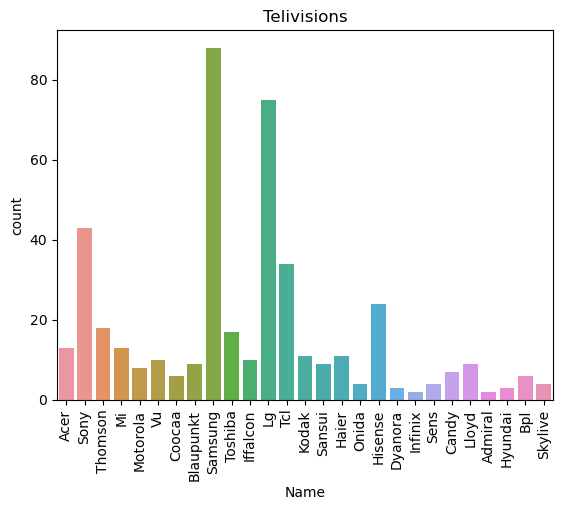

In [249]:
### plotting the countplot for telivions it shows no of telivisions brand wise
sns.countplot(x = df.Name)
plt.title('Telivisions')
plt.xticks(rotation = 90)
plt.show()

In [92]:
##### what are the top 15 brands of the Telivisions

In [93]:
df.Name.value_counts().iloc[:15]

Name
Samsung      88
Lg           75
Sony         43
Tcl          34
Hisense      24
Thomson      18
Toshiba      17
Acer         13
Mi           13
Haier        11
Kodak        11
Iffalcon     10
Vu           10
Blaupunkt     9
Sansui        9
Name: count, dtype: int64

In [94]:
#### plotting the graphs using univariate analysis

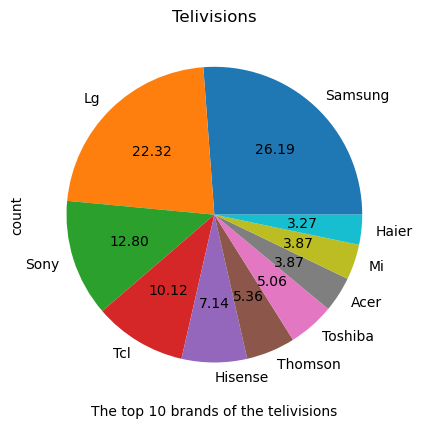

In [95]:
### this are the top 10 brands of the Telivision
df.Name.value_counts().iloc[:10].plot.pie(autopct = '%.2f')
plt.title('Telivisions')
plt.xlabel('The top 10 brands of the telivisions')
plt.show()

Text(0.5, 1.0, 'Count of the products by display')

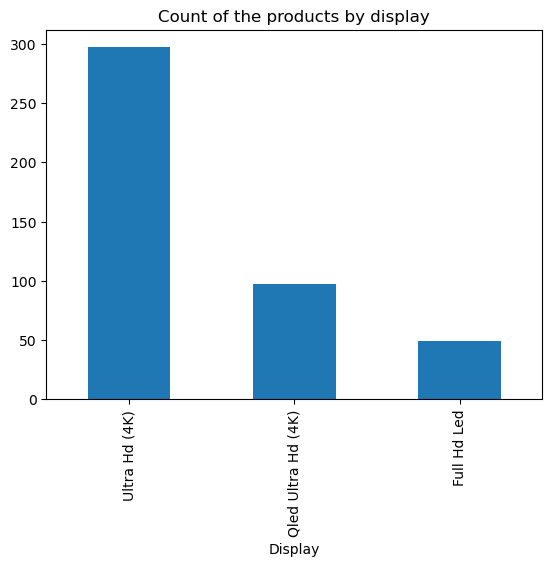

In [96]:
### count of the products by display
df.Display.value_counts().plot.bar()
plt.title('Count of the products by display')

# Ultra HD (4k) display TV's seems to be in greater demand as more than 70% of the products are catogorized as Telivision on website are of this type

In [250]:
#### which brand offers the more number of tvs
df['Name'].value_counts()
## samsung offers more number of products

Name
Samsung      88
Lg           75
Sony         43
Tcl          34
Hisense      24
Thomson      18
Toshiba      17
Acer         13
Mi           13
Haier        11
Kodak        11
Iffalcon     10
Vu           10
Blaupunkt     9
Sansui        9
Lloyd         9
Motorola      8
Candy         7
Coocaa        6
Bpl           6
Onida         4
Sens          4
Skylive       4
Dyanora       3
Hyundai       3
Infinix       2
Admiral       2
Name: count, dtype: int64

<Axes: xlabel='Name'>

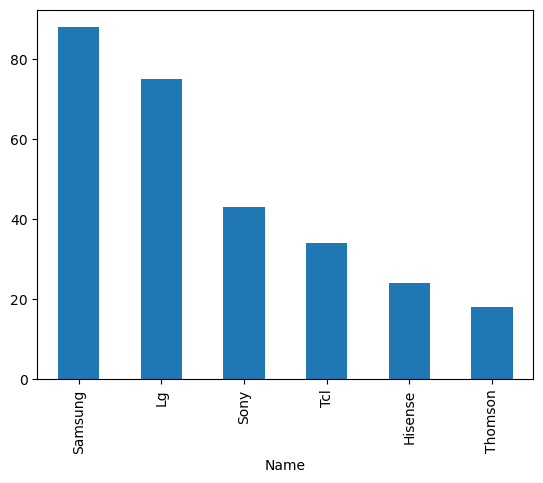

In [251]:
### top 6 brands with products count wise
df.Name.value_counts().iloc[:6].plot.bar()

# The samsung brand has more number of telivisons in the market and also the market closely followed by lg. While  tcl, sony, hisense, Thomson offers lesser number of products when compared to this brands

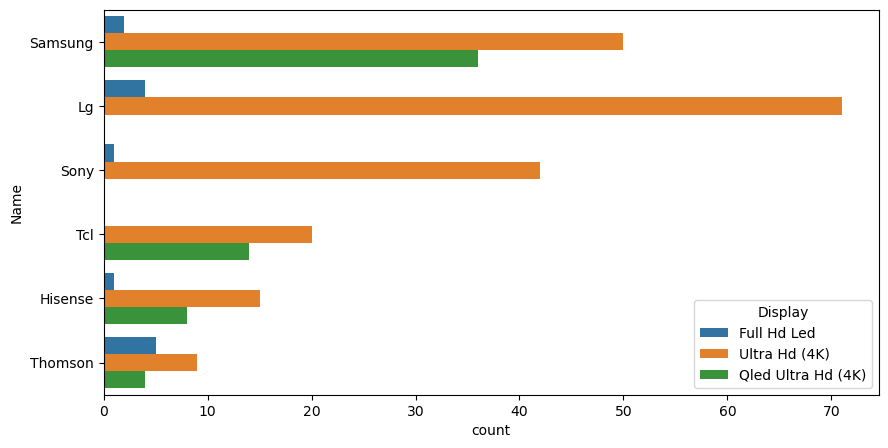

In [99]:
####
plt.figure(figsize = (10,5))
sns.countplot(y = 'Name',hue = 'Display', data = df, order = df.Name.value_counts().iloc[:6].index)
plt.show()

# From the above data we can clearly see the samung offers the products in all types of screen quality. while lg and sony does not offer the Qled Ultra HD (4k) display. Hisense and Thomson also offers all types of displays but in very less count

<Axes: xlabel='Screen_resolution', ylabel='count'>

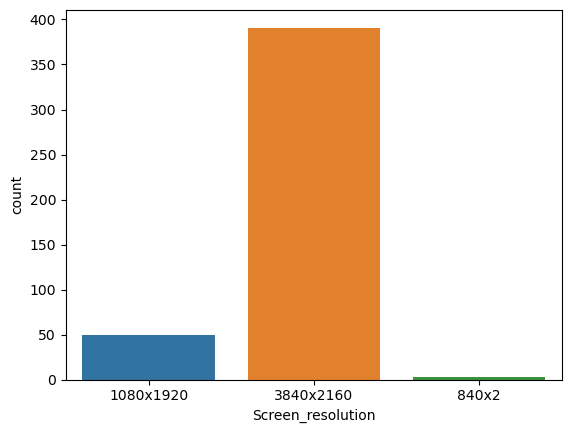

In [100]:
### most 90 percent of the tv screens supports 3840x2160 pixels resolution
sns.countplot(x = df.Screen_resolution)

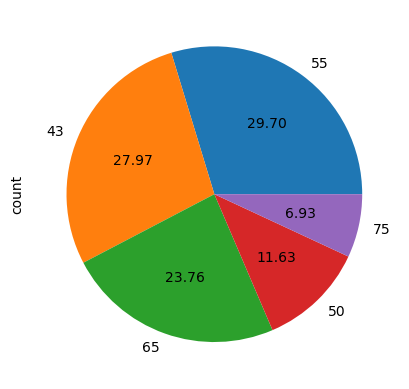

In [101]:
#### 43, 55, 65 inches are the common sizes of the tvs in market 
colors = sns.color_palette('pastel')[0:4]
df.Size.value_counts().head().plot.pie(autopct = '%.2f')
plt.show()

#  43, 55, 65 are the common sizes of the telivion markets

C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


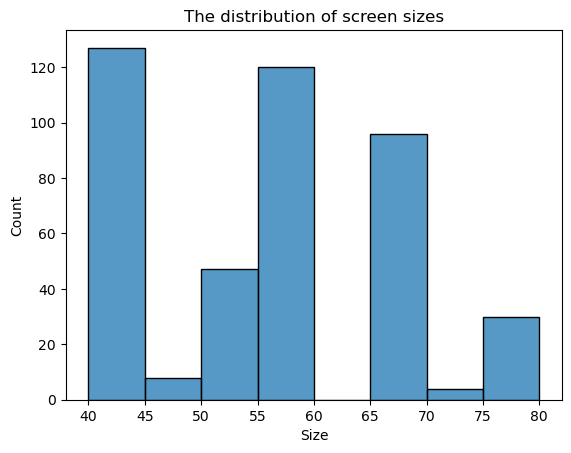

In [102]:
### Here we are using histogram plots to display distribution of screen sizes using bins 
plt.title('The distribution of screen sizes')
sns.histplot(x = 'Size', data = df, kde = False, bins = [40,45,50,55,60,65,70,75,80])
plt.show()

<Axes: ylabel='Selling_Price'>

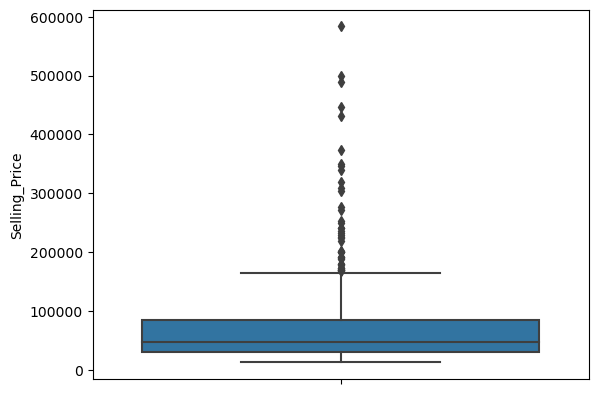

In [103]:
#### 
sns.boxplot(y = df.Selling_Price)


<Axes: ylabel='Original_Price'>

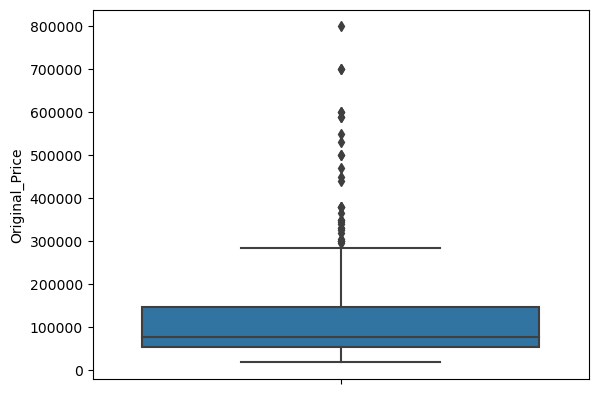

In [104]:
sns.boxplot(y = df.Original_Price)

# bivariate analysis

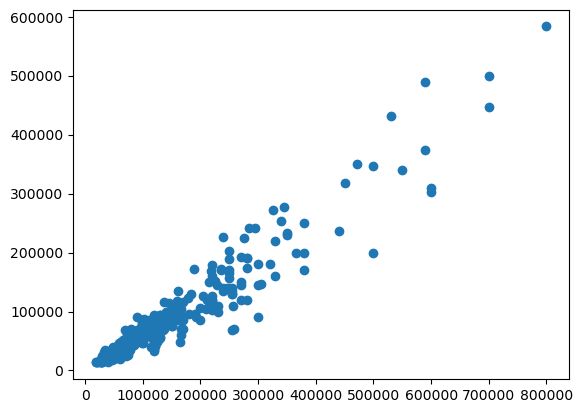

In [106]:
plt.scatter(y = df.Selling_Price, x = df.Original_Price)

C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


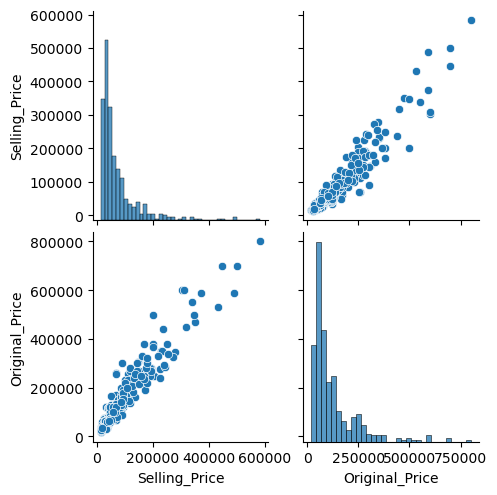

In [107]:
sns.pairplot(data = df, vars = ['Selling_Price','Original_Price'])

C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


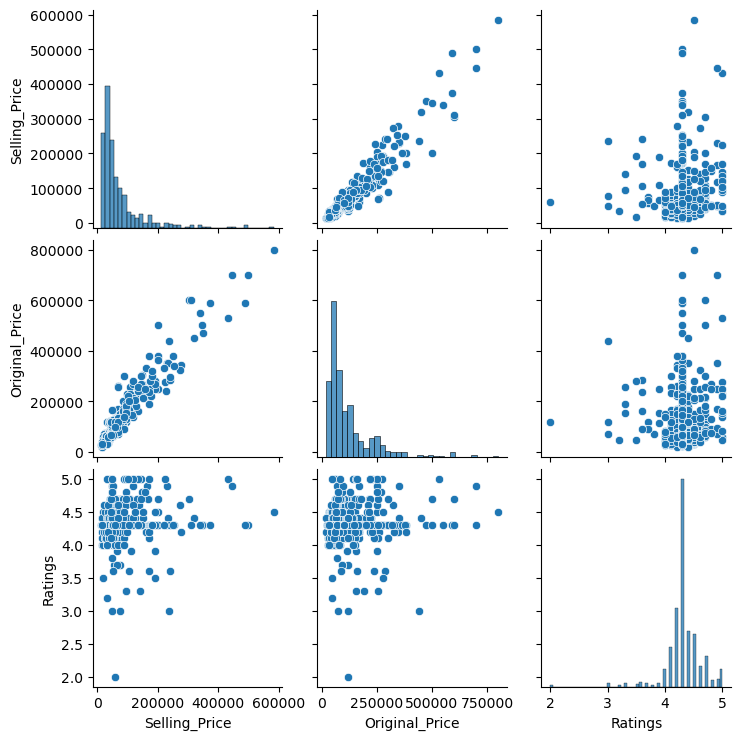

In [108]:
sns.pairplot(df[['Selling_Price', 'Original_Price', 'Ratings']])
plt.show()

In [252]:
### the brand wise average ratings
round(df.groupby(by = 'Name').Ratings.mean().sort_values(ascending = False),1)

Name
Sony         4.6
Blaupunkt    4.4
Thomson      4.4
Kodak        4.4
Candy        4.4
Lloyd        4.4
Samsung      4.3
Onida        4.3
Lg           4.3
Sansui       4.3
Mi           4.3
Toshiba      4.3
Skylive      4.3
Motorola     4.3
Bpl          4.3
Vu           4.3
Sens         4.2
Coocaa       4.2
Hisense      4.2
Iffalcon     4.2
Infinix      4.2
Acer         4.2
Haier        4.1
Tcl          4.1
Dyanora      4.1
Admiral      4.0
Hyundai      3.9
Name: Ratings, dtype: float64

C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Launch_Year', ylabel='Ratings'>

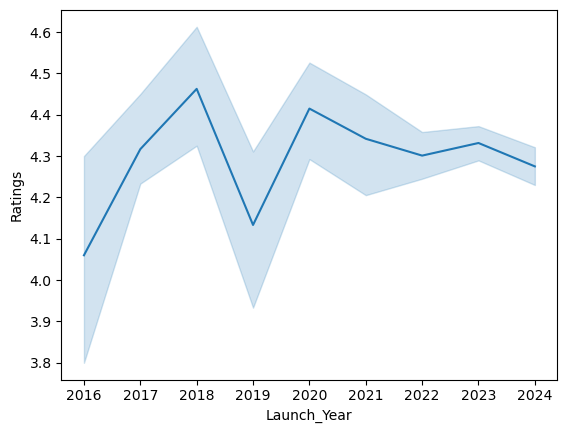

In [110]:
## this are the ratings year wise how it increases year wise 
sns.lineplot(x = df.Launch_Year, y = df.Ratings)

#  From the above line plots we can see the ratings are being fluctuated year wise. Rating might be goes up and down. Upward trend indicates improving ratings, while a downward trend indicates declining ratings.

C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mdazh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Launch_Year', ylabel='Selling_Price'>

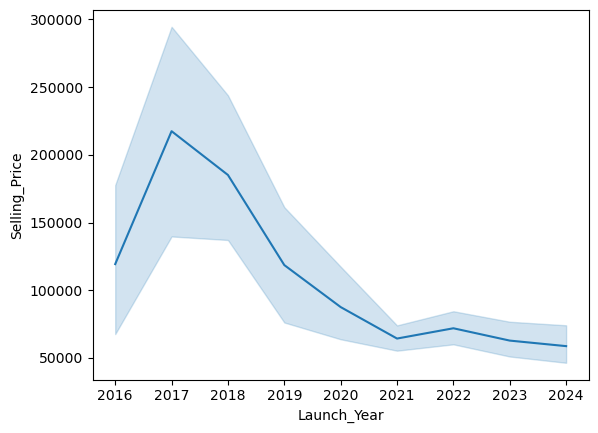

In [111]:
### by this data we can cleary see that the budget of the tvs was very high in 2016 and 2017 but after 2021 the prices vary between 
#### 50000 to 1 lakh rupees
sns.lineplot(x = df.Launch_Year, y = df.Selling_Price)

# From the above line plots we can see the seling prices of the products are decresing. From this we can see prices of the prodcuts may decrease over time. If the technology is new the prices are high and products are in high demand. 

In [112]:
#### brand wise average prices
round(df.groupby(by = 'Name').Selling_Price.mean())

Name
Acer          36997.0
Admiral       24999.0
Blaupunkt     26840.0
Bpl           30326.0
Candy         35490.0
Coocaa        26349.0
Dyanora       17499.0
Haier         38575.0
Hisense       72490.0
Hyundai       29963.0
Iffalcon      29448.0
Infinix       28499.0
Kodak         32435.0
Lg            99944.0
Lloyd         50757.0
Mi            36613.0
Motorola      34840.0
Onida         48424.0
Samsung      111070.0
Sansui        51513.0
Sens          28574.0
Skylive       15840.0
Sony         121693.0
Tcl           56866.0
Thomson       31938.0
Toshiba       51756.0
Vu            42807.0
Name: Selling_Price, dtype: float64

In [113]:
round(df.groupby(by = 'Name').Selling_Price.median())

Name
Acer         29999.0
Admiral      24999.0
Blaupunkt    26999.0
Bpl          25894.0
Candy        32990.0
Coocaa       24499.0
Dyanora      16999.0
Haier        35990.0
Hisense      45249.0
Hyundai      25999.0
Iffalcon     27249.0
Infinix      28499.0
Kodak        30999.0
Lg           80999.0
Lloyd        45890.0
Mi           32990.0
Motorola     32499.0
Onida        40649.0
Samsung      73445.0
Sansui       33599.0
Sens         26749.0
Skylive      16102.0
Sony         77999.0
Tcl          48994.0
Thomson      24249.0
Toshiba      39999.0
Vu           34749.0
Name: Selling_Price, dtype: float64

In [114]:
### brand wise Average prices using crosstab which shows the average price of the tvs with respect to displays
pd.crosstab(df.Name, df.Display , values = df.Selling_Price, aggfunc = ('mean')).iloc[:]

Display,Full Hd Led,Qled Ultra Hd (4K),Ultra Hd (4K)
Name,,,
Acer,19249.000000,30999.000000,41146.300000
Admiral,18999.000000,NaN,30999.000000
Blaupunkt,15665.666667,40633.500000,28324.000000
Bpl,22556.333333,47999.000000,33144.500000
Candy,17990.000000,47490.000000,33865.000000
Coocaa,14499.000000,34999.000000,24532.333333
Dyanora,16249.000000,NaN,19999.000000
Haier,23990.000000,39990.000000,40038.444444
Hisense,22999.000000,51210.375000,87138.400000


In [115]:
### brand wise Average prices using crosstab which shows the average price of the tvs with respect to displays
pd.crosstab(df.Name, df.Display , values = df.Selling_Price, aggfunc = ('median')).iloc[:]

Display,Full Hd Led,Qled Ultra Hd (4K),Ultra Hd (4K)
Name,,,
Acer,19249.0,30999.0,29999.0
Admiral,18999.0,NaN,30999.0
Blaupunkt,14999.0,40633.5,28299.0
Bpl,22190.0,47999.0,33144.5
Candy,17990.0,47490.0,31490.0
Coocaa,14499.0,34999.0,24999.0
Dyanora,16249.0,NaN,19999.0
Haier,23990.0,39990.0,35990.0
Hisense,22999.0,45849.0,51499.0


In [116]:
### creating a data frame as tvs under 30000 and ratings > 4
df1 = df[(df.Selling_Price<=35000)&(df.Ratings > 4.0)]

In [117]:
### creating a data frame as tvs greater than 35000 and less than 75000 and ratings > 4
df2 = df[(df.Selling_Price>=35000)&(df.Selling_Price<=200000)&(df.Ratings > 4.0)]

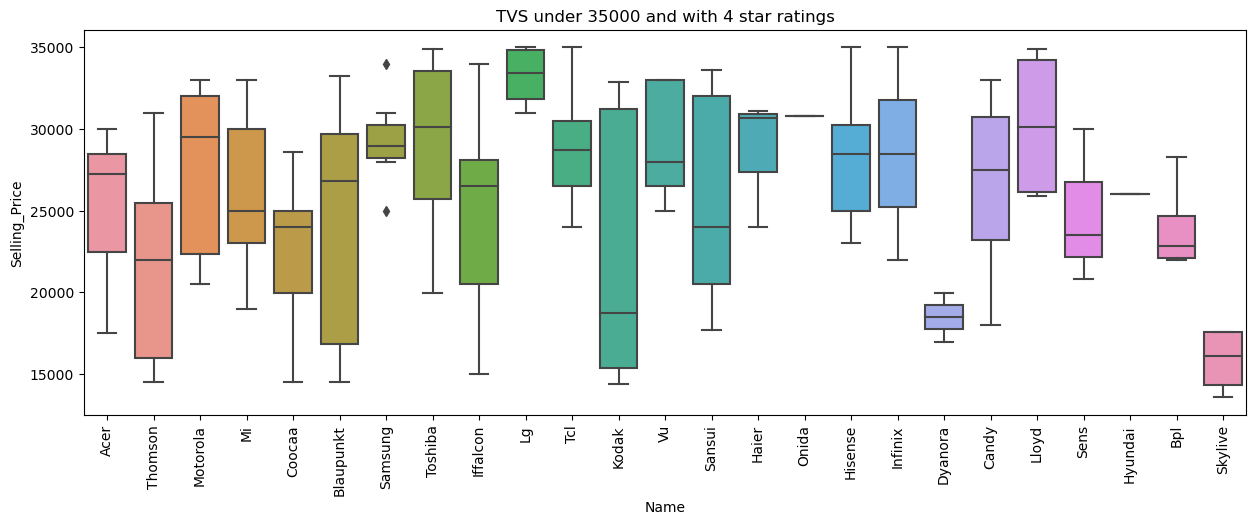

In [229]:
#### midrange considering budget
plt.figure(figsize = (15,5))
sns.boxplot(y = 'Selling_Price', x = 'Name', data = df1)
plt.title('TVS under 35000 and with 4 star ratings')
plt.xticks(rotation = 90)
plt.show()

# From df1, the midrange TVs include almost every brand except Sony. The most affordable TVs with 4-star ratings are from Thomson, Mi, Kodak, Coocaa, Motorola, Blaupunkt, and Acer.

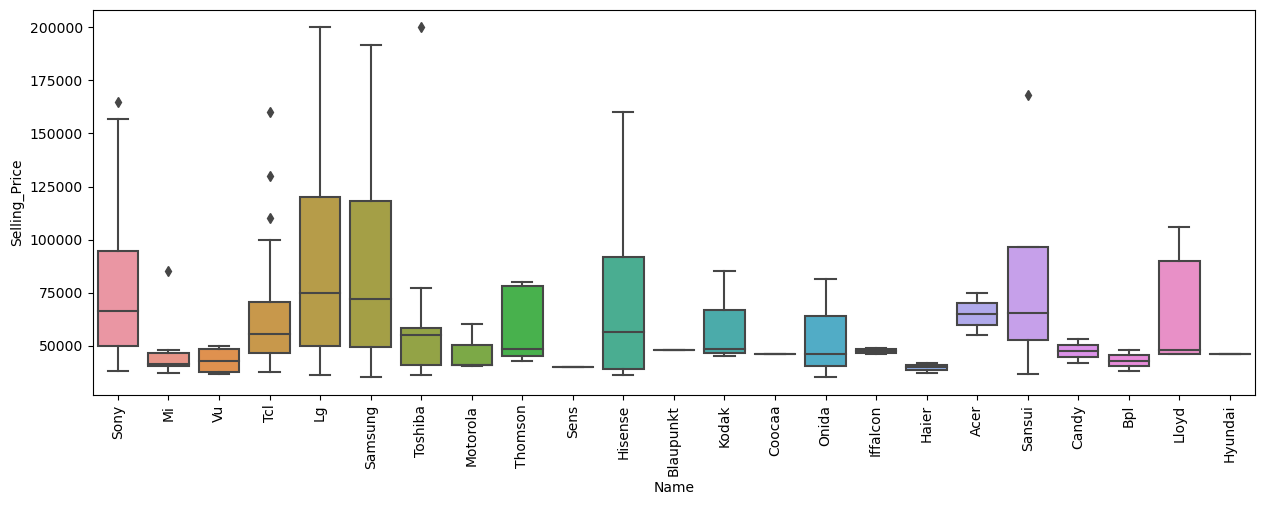

In [119]:
plt.figure(figsize = (15,5))
sns.boxplot(y = 'Selling_Price', x = 'Name', data = df2)
plt.xticks(rotation = 90)
plt.show()

# From df2, the most expensive brands are Sony, Samsung, and LG, which have the highest prices. Meanwhile, brands like Lloyd, TCL, MI,Thomson, Toshiba, Motorola, Hisense, and Acer are the most affordable compared to Sony, Samsung, and LG."

This version clarifies the comparison between the most expensive and the most affordable brands.

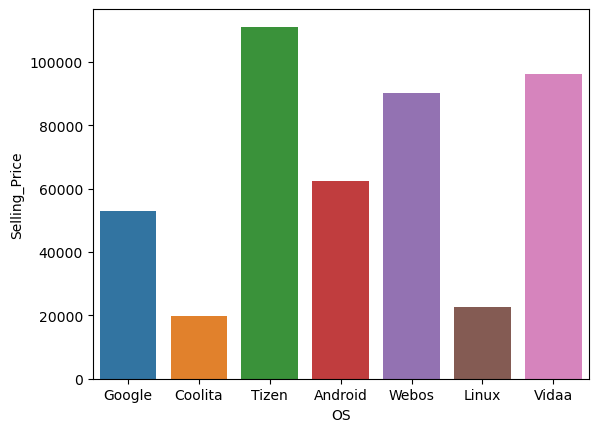

In [120]:
sns.barplot(x = df.OS, y = df.Selling_Price, errorbar = None)
plt.show()

# From the above chart the most expensive Operating systems are Tizen, Android and WebOS. while Google, Vidaa, are the Operating systems which offers at mid rangers. Meanwhile coolita and LinuxOS are the most affordable ones.

<Axes: >

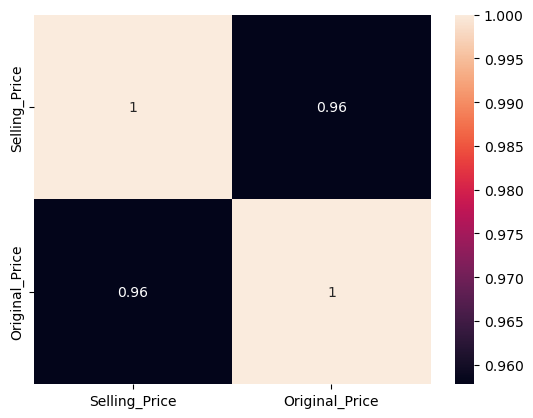

In [215]:
sns.heatmap(df[['Selling_Price','Original_Price']].corr(),annot = True)

# Conclusion

1) 
There are 27 brands of the TV With the different types of sizes and Operating Systems in the Telivision Market

2) 
The Popular Brands are Samsung, LG, Sony in the market. Where there are some competative Brands like TCL, Toshiba, Thompson,
Hisensce with competative products in the market

3) 
Samsung Has the largest Number of products in all types of display's and screen sizes.

4) 
The Most prefred screen sizes are 43, 50, 55, 65 inches and tv's should have screen resoltion's upto 3840*2160 interms of
screen resolutions to support Ultra HD (4K) display.

5) 
There is positive correlation between Original Price and  Selling Price. If the Original price increases then the selling price tends to increase. Higher priced items sold at near their original prices 

6) 
Brands such as TCL, MI, Thomson, Toshiba, and Acer offer an average selling price, indicating a good balance of cost and 
quality. These brands typically use operating systems like Google and Vidaa.

7) 
Samsung, LG, and Sony are the most expensive brands in terms of pricing and quality. These TVs offer the latest operating 
systems such as Tizen, webOS, and Android TV, which support all connectivity and portability options, making the products more 
expensive.

